# Loda dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('children anemia.csv')

# Explore and clean data

In [3]:
df.head(20)

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No
5,30-34,Urban,Higher,Richest,1,30,113.0,Mild,Yes,No,Married,Living with her,NaN,No,119.0,Not anemic,No
6,35-39,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,102.0,Mild,Yes
7,35-39,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,NaN,NaN,NaN,NaN,NaN
8,30-34,Urban,Secondary,Richest,1,32,NaN,NaN,Yes,No,Married,Living with her,Immediately,No,NaN,NaN,No
9,20-24,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,Living with her,Immediately,No,113.0,Not anemic,Yes


In [4]:
df.shape

(33924, 17)

In [5]:
df.info() #missing value in some features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33924 entries, 0 to 33923
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   33924 non-null  object 
 1   Type of place of residence                                             33924 non-null  object 
 2   Highest educational level                                              33924 non-null  object 
 3   Wealth index combined                                                  33924 non-null  object 
 4   Births in last five years                                              33924 non-null  int64  
 5   Age of respondent at 1st birth                                         33924 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null 

In [6]:
df.duplicated().sum()

4678

In [7]:
df = df.dropna().drop_duplicates()

In [8]:
#drop 'anemia level.1'
df = df.drop('Anemia level.1', axis=1)

df.shape

(5878, 16)

In [9]:
df.columns

Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Taking iron pills, sprinkles or syrup'],
      dtype='object')

In [10]:
df.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
Age in 5-year groups,5878,7,25-29,1538
Type of place of residence,5878,2,Rural,3564
Highest educational level,5878,4,No education,2269
Wealth index combined,5878,5,Middle,1248
Anemia level,5878,4,Not anemic,2464
Have mosquito bed net for sleeping (from household questionnaire),5878,2,Yes,4018
Smokes cigarettes,5878,2,No,5865
Current marital status,5878,2,Married,5657
Currently residing with husband/partner,5878,2,Living with her,5268
When child put to breast,5878,37,Immediately,2755


In [11]:
cat=df.select_dtypes('object').columns
for x in cat:
    print('{} = {}'.format(x, df[x].unique()))

Age in 5-year groups = ['25-29' '35-39' '20-24' '30-34' '15-19' '45-49' '40-44']
Type of place of residence = ['Urban' 'Rural']
Highest educational level = ['Secondary' 'Higher' 'No education' 'Primary']
Wealth index combined = ['Richest' 'Richer' 'Middle' 'Poorer' 'Poorest']
Anemia level = ['Moderate' 'Not anemic' 'Mild' 'Severe']
Have mosquito bed net for sleeping (from household questionnaire) = ['Yes' 'No']
Smokes cigarettes = ['No' 'Yes']
Current marital status = ['Married' 'Living with partner']
Currently residing with husband/partner = ['Living with her' 'Staying elsewhere']
When child put to breast = ['105.0' 'Immediately' 'Days: 1' 'Hours: 1' '103.0' '203.0' '102.0'
 '111.0' '106.0' '104.0' '202.0' '107.0' '108.0' '120.0' '123.0' '110.0'
 '112.0' '207.0' '113.0' '205.0' '109.0' '117.0' '115.0' '212.0' '114.0'
 '204.0' '119.0' '211.0' '121.0' '214.0' '206.0' '118.0' '210.0' '208.0'
 '116.0' '223.0' '220.0']
Had fever in last two weeks = ['No' 'Yes' "Don't know"]
Taking iron pil

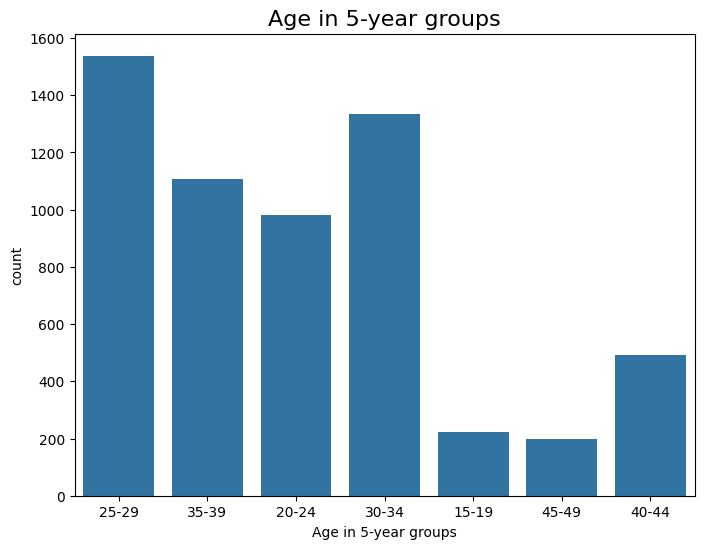

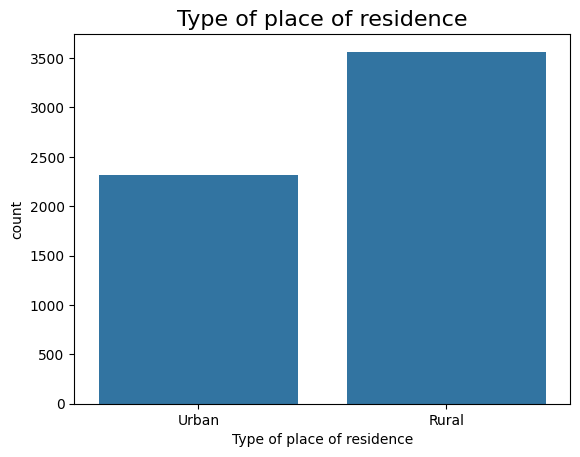

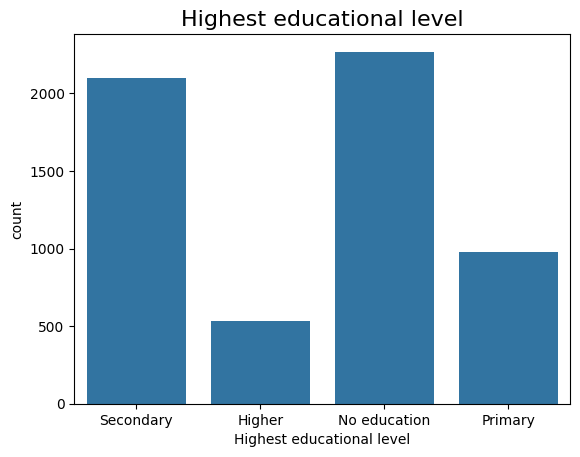

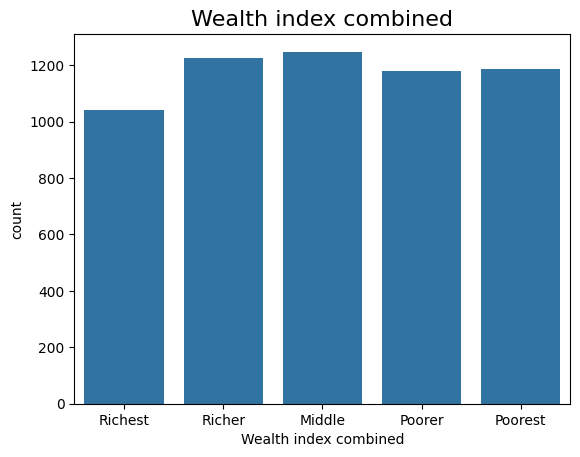

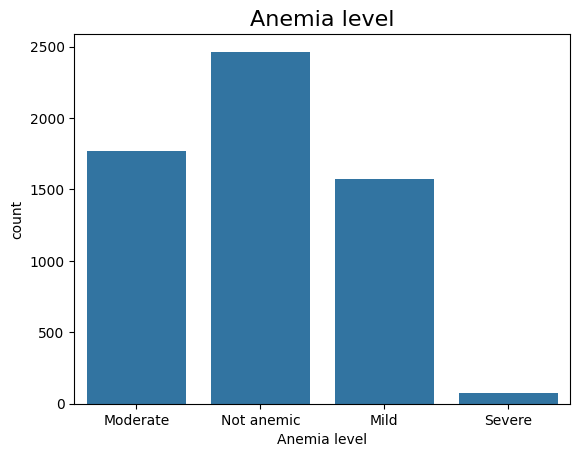

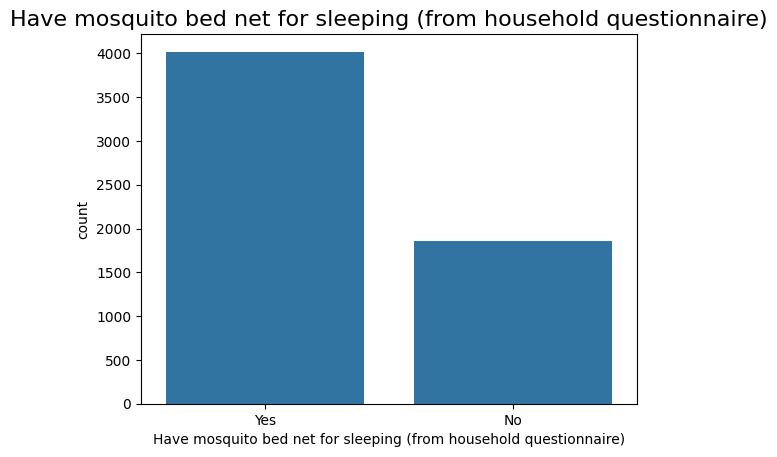

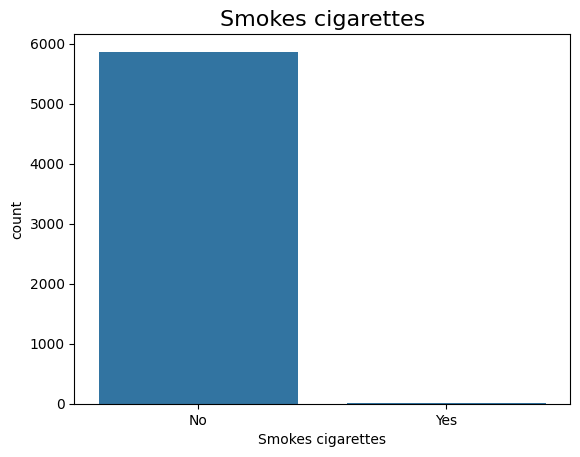

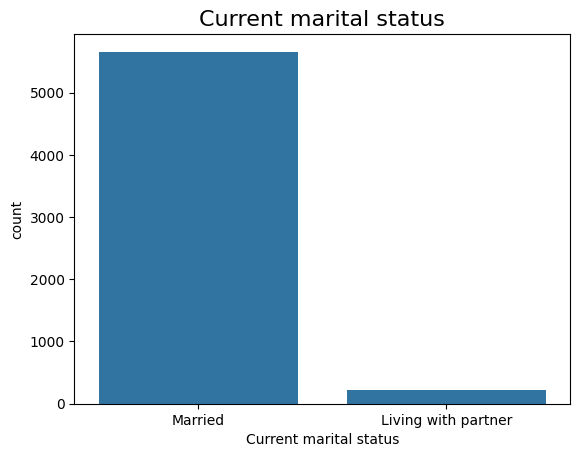

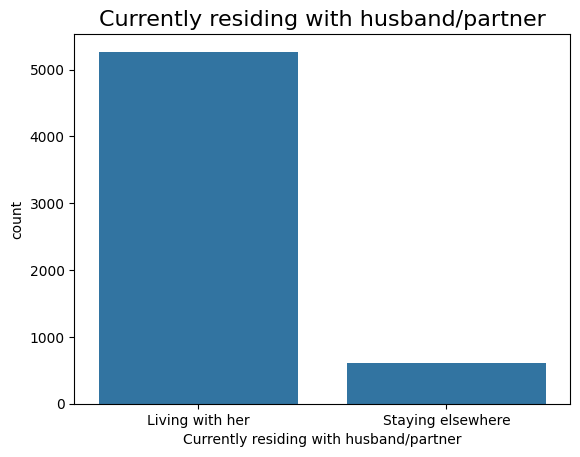

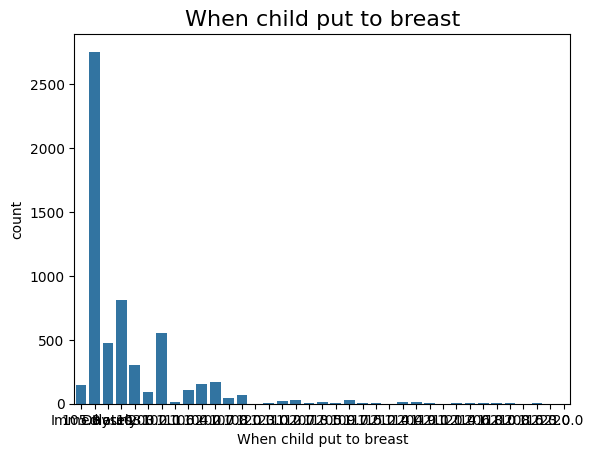

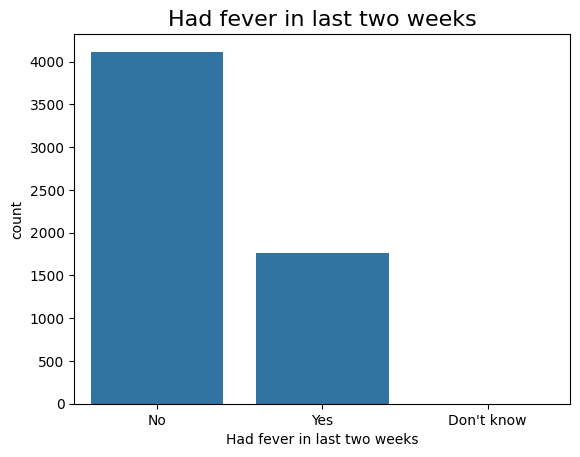

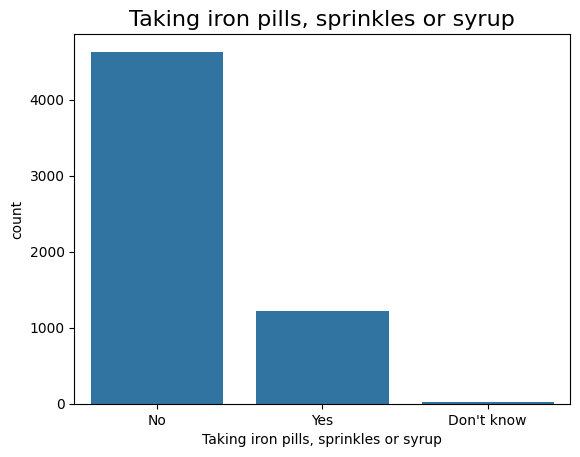

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))

for column in cat:
    sns.countplot(x=column, data=df)
    plt.title(f'{column}', fontsize=16)
    plt.show()

In [14]:
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
Births in last five years,5878.0,1.51,0.61,1.0,1.0,1.0,2.0,4.0
Age of respondent at 1st birth,5878.0,20.02,4.49,12.0,17.0,19.0,23.0,43.0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),5878.0,114.53,15.62,20.0,105.0,115.0,125.0,166.0
Hemoglobin level adjusted for altitude (g/dl - 1 decimal),5878.0,100.17,15.44,29.0,91.0,102.0,111.0,170.0


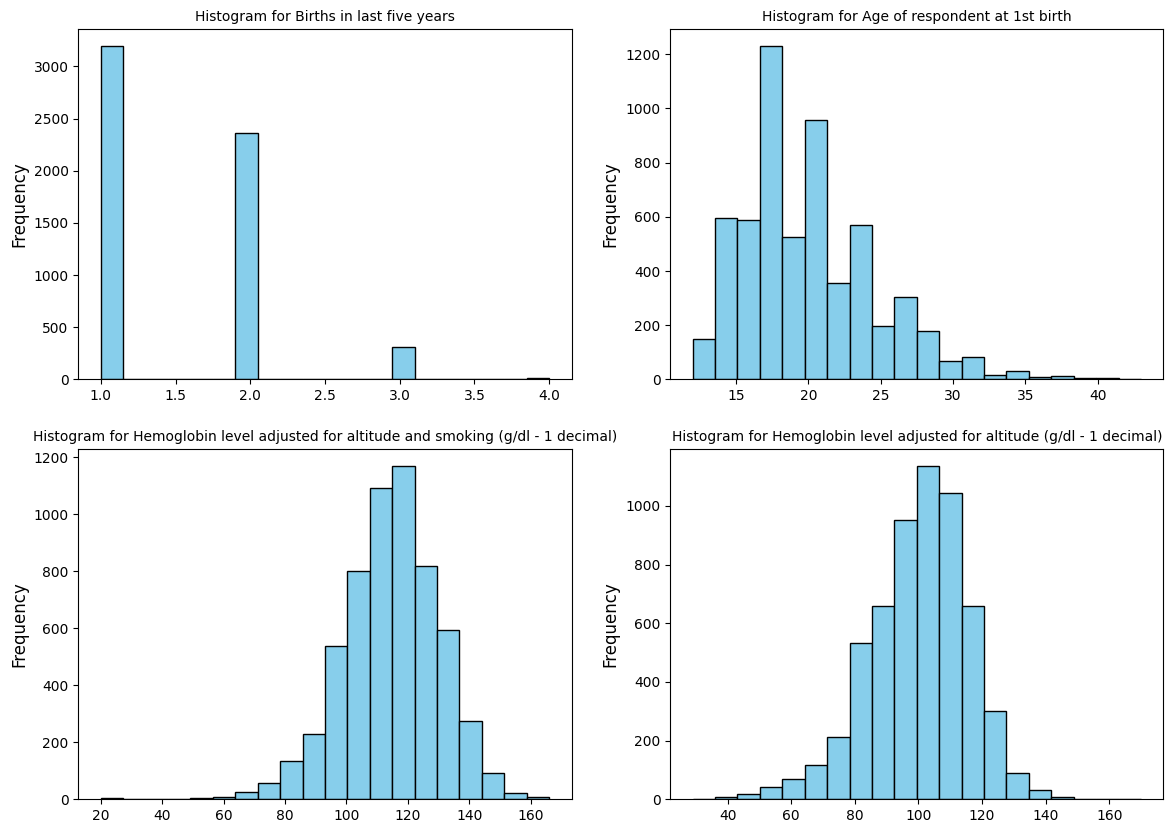

In [15]:
numeric = df.select_dtypes(exclude=['object']).columns

plt.figure(figsize=(14, 10))

for num in numeric:
    plt.subplot(2, 2 , numeric.get_loc(num) + 1)  
    plt.hist(x=df[num], bins=20, color='skyblue', edgecolor='black')
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Histogram for {num}', fontsize=10)
    
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[cat] = df[cat].apply(encoder.fit_transform)

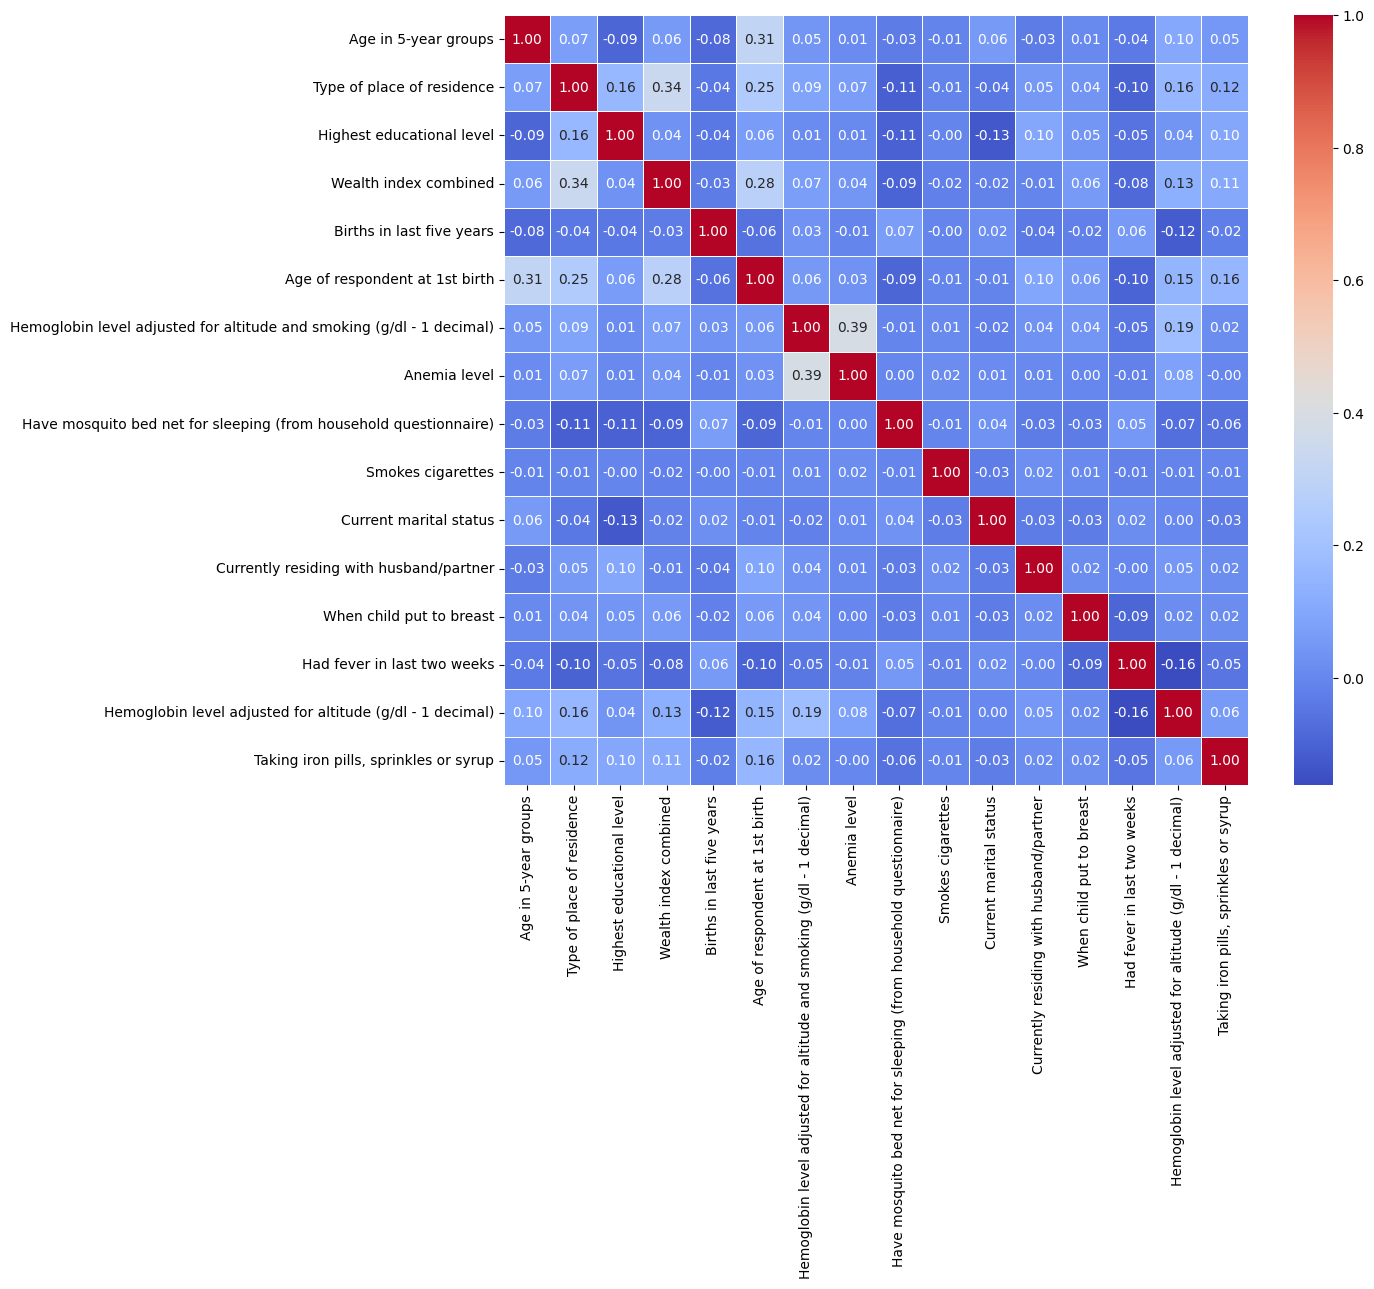

In [17]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.show()

In [18]:
print("Most positively correlated features with the target")
corr.sort_values(by='Anemia level', ascending=False, inplace=True)
print(corr['Anemia level'])

Most positively correlated features with the target
Anemia level                                                             1.000000
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0.390608
Hemoglobin level adjusted for altitude (g/dl - 1 decimal)                0.081005
Type of place of residence                                               0.067727
Wealth index combined                                                    0.044045
Age of respondent at 1st birth                                           0.030197
Smokes cigarettes                                                        0.016022
Current marital status                                                   0.011543
Age in 5-year groups                                                     0.011207
Highest educational level                                                0.006965
Currently residing with husband/partner                                  0.006509
Have mosquito bed net for sleeping (from house

# Model

In [19]:
#select most correlated features
df.rename(columns={'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)': 'Hemoglobin level'}, inplace=True)

X = df[['Hemoglobin level', 'Type of place of residence', 'Wealth index combined', 'Age of respondent at 1st birth']]
y = df['Anemia level']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

In [ ]:
import pickle
with open('children anemia.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
X

In [20]:
y.value_counts()

Anemia level
2    2464
1    1767
0    1575
3      72
Name: count, dtype: int64

In [21]:
y

3        1
6        2
9        1
12       0
13       0
        ..
33914    1
33917    0
33918    2
33921    2
33922    2
Name: Anemia level, Length: 5878, dtype: int32